In [ ]:
# Get training data from course folder and unzip
# importing the zipfile module
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
import os
# loading the temp.zip and creating a zip object
with ZipFile('/content/drive/My Drive/Advanced ML Project 1/world_happiness_competition_data.zip', 'r') as zObject:
    zObject.extractall('/content/drive/My Drive/Advanced ML Project 1')

# List extracted files
extracted_files = os.listdir('/content/drive/My Drive/Advanced ML Project 1')
print(extracted_files)

['assignment1.ipynb', 'world_happiness_competition_data.zip', '._X_train.csv', '._X_test.csv', '._y_test.csv', '._y_train.csv', 'world_happiness_competition_data', '__MACOSX', 'newcountryvars.csv']


In [ ]:

import pandas as pd

zip_path = '/content/drive/My Drive/Advanced ML Project 1/world_happiness_competition_data.zip'
extract_path = '/content/drive/My Drive/Advanced ML Project 1/world_happiness_competition_data'

with ZipFile(zip_path, 'r') as zObject:
    zObject.extractall(extract_path)

extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)

X_train = pd.read_csv(os.path.join(extract_path, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(extract_path, 'X_test.csv'))
y_train = pd.read_csv(os.path.join(extract_path, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(extract_path, 'y_test.csv'))



y_train_labels = y_train.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)

print(y_train.head())
print(y_train_labels)


Extracted files: ['.DS_Store', 'X_train.csv', 'y_test.csv', 'y_train.csv', 'X_test.csv', 'world_happiness_competition_data', '__MACOSX', 'newcountryvars.csv']
   Average  High  Low  Very High  Very Low
0        0     1    0          0         0
1        0     0    0          0         1
2        1     0    0          0         0
3        0     0    0          0         1
4        0     1    0          0         0
0         High
1     Very Low
2      Average
3     Very Low
4         High
        ...   
64    Very Low
65         Low
66    Very Low
67        High
68    Very Low
Length: 69, dtype: object


In [ ]:

countrydata = pd.read_csv(os.path.join(extract_path, 'newcountryvars.csv'))

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [ ]:


countrydata = pd.read_csv(os.path.join(extract_path, 'newcountryvars.csv'))

X_train_merged = pd.merge(X_train, countrydata, left_on='Country or region', right_on='country_name', how='left')

X_test_merged = pd.merge(X_test, countrydata, left_on='Country or region', right_on='country_name', how='left')

X_train_merged.head()

X_test_merged.head()




,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Nepal,0.446,1.226,0.677,0.439,0.285,0.089,Nepal,Asia,Southern Asia,197.0,Nepal,29304998,25.2,0.558162,69.989,12.21763,4.067797,2337.069534
1,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.0,Peru,32165485,22.7,0.739749,74.814,13.38634,9.013470,11294.840330
2,Cambodia,0.574,1.122,0.637,0.609,0.232,0.062,Cambodia,Asia,South-eastern Asia,2.0,Cambodia,16005373,17.7,0.563082,68.807,10.90489,4.669575,3095.317595
3,Central African Republic,0.026,0.000,0.105,0.225,0.235,0.035,Central African Republic,Africa,Sub-Saharan Africa,76.0,Central African Republic,4659080,NaN,0.352440,51.458,7.09898,4.230000,587.473961
4,Rwanda,0.359,0.711,0.614,0.555,0.217,0.411,Rwanda,Africa,Sub-Saharan Africa,20.0,Rwanda,12208407,39.1,0.497577,64.749,10.76172,3.801335,1616.857330


In [ ]:

X_train_merged = pd.merge(X_train, countrydata, left_on='Country or region', right_on='country_name', how='left')

X_test_merged = pd.merge(X_test, countrydata, left_on='Country or region', right_on='country_name', how='left')

print("Merged X_train:")
print(X_train_merged.head())

print("Merged X_test:")
print(X_test_merged.head())


Merged X_train:
  Country or region  GDP per capita  Social support  Healthy life expectancy  \
0            Latvia           1.187           1.465                    0.812   
1           Burundi           0.046           0.447                    0.380   
2           Belarus           1.067           1.465                    0.789   
3           Liberia           0.073           0.922                    0.443   
4           Ecuador           0.912           1.312                    0.868   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.264       0.075                      0.064   
1                         0.220       0.176                      0.180   
2                         0.235       0.094                      0.142   
3                         0.370       0.233                      0.033   
4                         0.498       0.126                      0.087   

      name    region                       sub-region  Ter

In [ ]:
X_train.head(1)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111


# EDA

In [ ]:
print(X_train.dtypes)

Country or region                object
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
name                             object
region                           object
sub-region                       object
Terrorist_attacks               float64
dtype: object


In [ ]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [ ]:
missing_values = X_train.isnull().sum()

missing_percentage = (missing_values / len(X_train)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print(missing_data)


                              Missing Values  Percentage
Country or region                          0         0.0
GDP per capita                             0         0.0
Social support                             0         0.0
Healthy life expectancy                    0         0.0
Freedom to make life choices               0         0.0
Generosity                                 0         0.0
Perceptions of corruption                  0         0.0
name                                       0         0.0
region                                     0         0.0
sub-region                                 0         0.0
Terrorist_attacks                          0         0.0


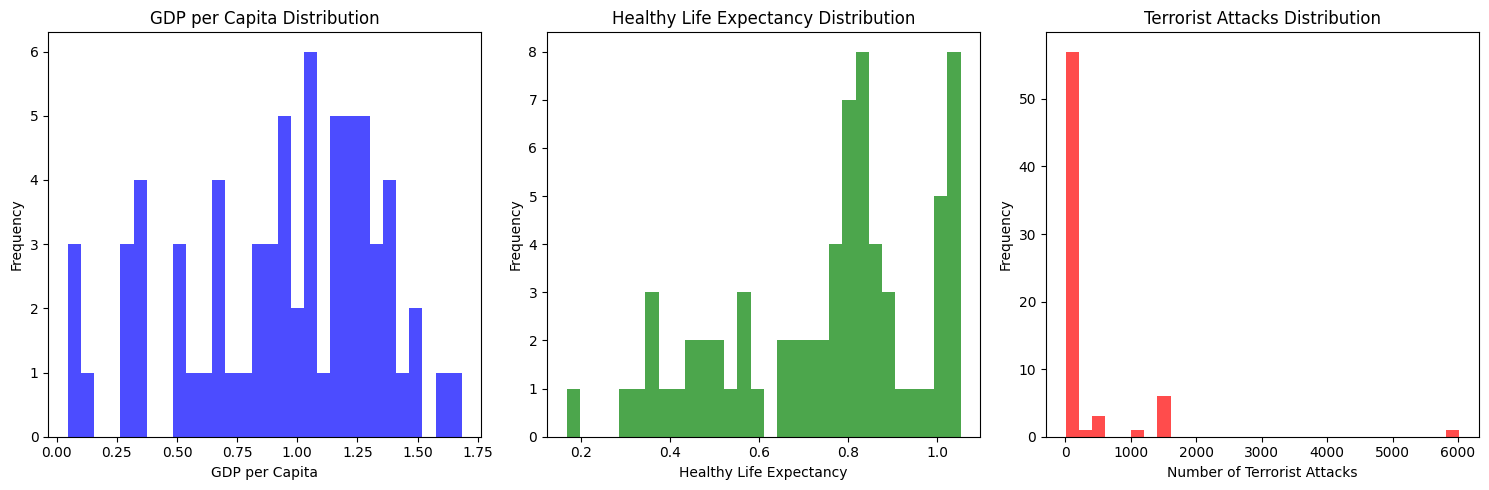

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(X_train['GDP per capita'], bins=30, color='blue', alpha=0.7)
plt.title('GDP per Capita Distribution')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(X_train['Healthy life expectancy'], bins=30, color='green', alpha=0.7)
plt.title('Healthy Life Expectancy Distribution')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(X_train['Terrorist_attacks'], bins=30, color='red', alpha=0.7)
plt.title('Terrorist Attacks Distribution')
plt.xlabel('Number of Terrorist Attacks')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

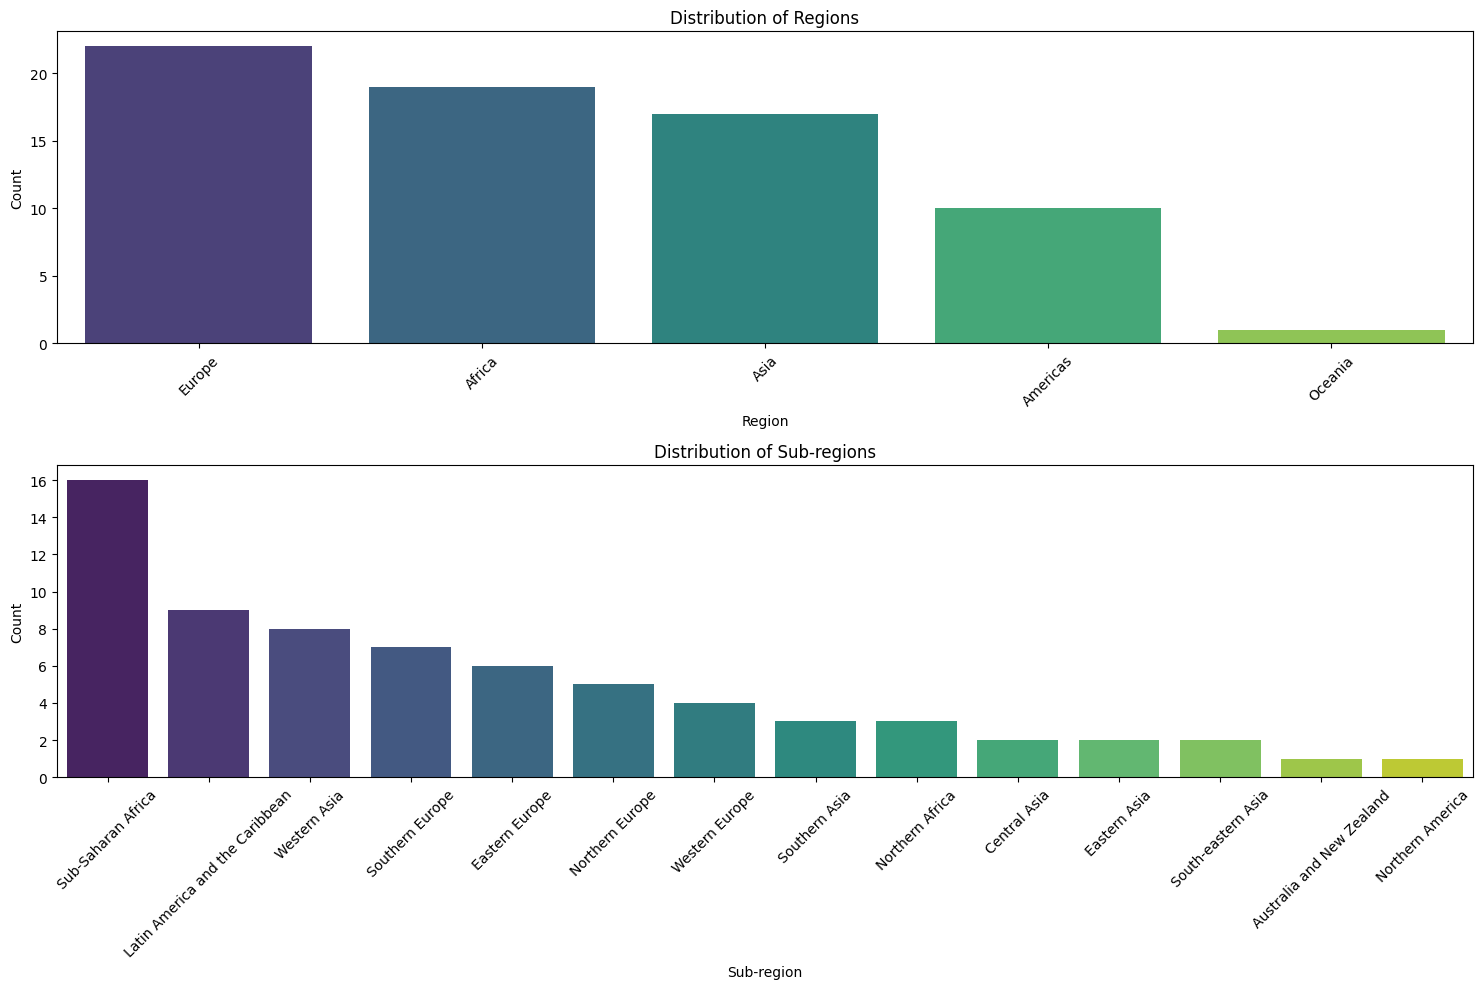

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.countplot(data=X_train, x='region', order=X_train['region'].value_counts().index, palette='viridis')
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.countplot(data=X_train, x='sub-region', order=X_train['sub-region'].value_counts().index, palette='viridis')
plt.title('Distribution of Sub-regions')
plt.xlabel('Sub-region')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


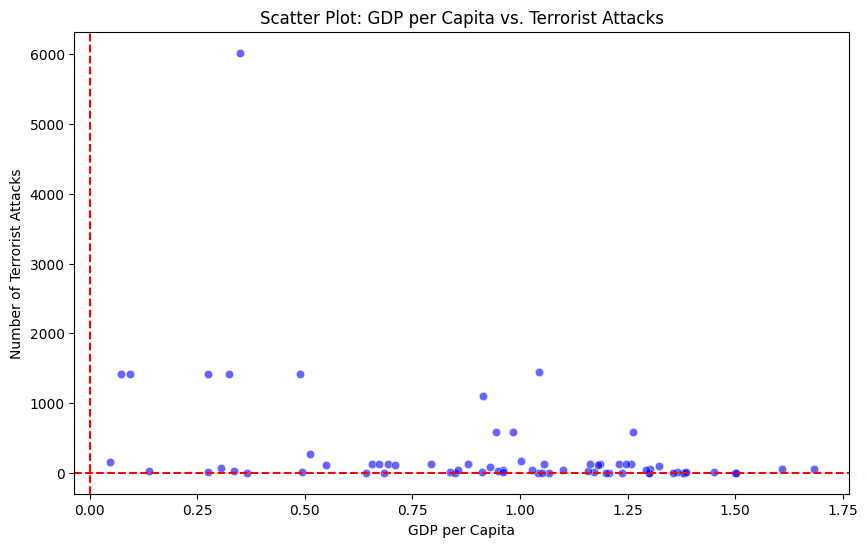

Correlation between GDP per Capita and Terrorist Attacks: -0.36


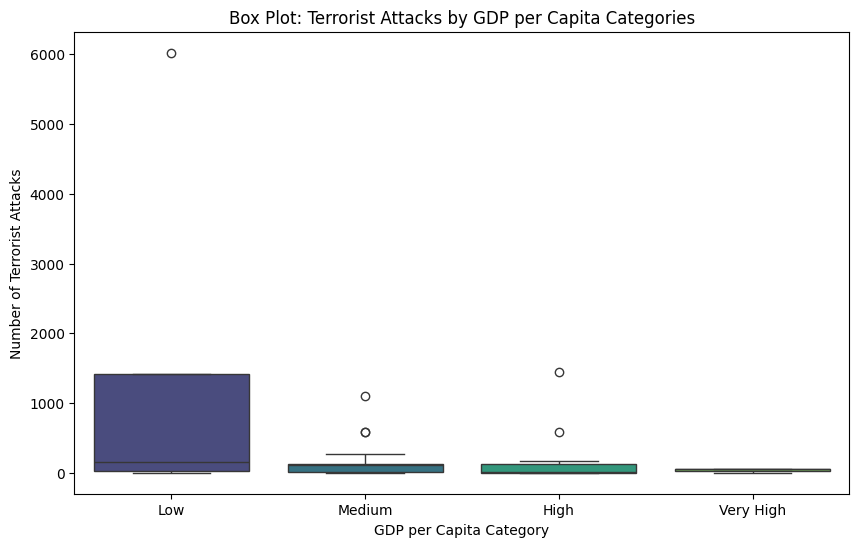

In [ ]:



plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='GDP per capita', y='Terrorist_attacks', color='blue', alpha=0.6)
plt.title('Scatter Plot: GDP per Capita vs. Terrorist Attacks')
plt.xlabel('GDP per Capita')
plt.ylabel('Number of Terrorist Attacks')
plt.axhline(y=0, color='red', linestyle='--')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

correlation = X_train[['GDP per capita', 'Terrorist_attacks']].corr().iloc[0, 1]

print(f"Correlation between GDP per Capita and Terrorist Attacks: {correlation:.2f}")

X_train['GDP Category'] = pd.cut(X_train['GDP per capita'], bins=[0, 0.5, 1, 1.5, 2], labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='GDP Category', y='Terrorist_attacks', palette='viridis')
plt.title('Box Plot: Terrorist Attacks by GDP per Capita Categories')
plt.xlabel('GDP per Capita Category')
plt.ylabel('Number of Terrorist Attacks')
plt.show()


In [ ]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = ['region', 'sub-region']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_object = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor_object.fit(X_train)

X_train_transformed = preprocessor_object.transform(X_train)

print("Original X_train shape:", X_train.shape)

In [ ]:

def preprocessor(data):
    if 'name' in data.columns:
        data.drop(['name'], axis=1, inplace=True)

    preprocessed_data = preprocessor_object.transform(data)
    return preprocessed_data

preprocessed_X_train = preprocessor(X_train)

print("Shape of preprocessed X_train:", preprocessed_X_train.shape)

print("Numeric Features Used:")
print(numeric_features)

print("Categorical Features Used:")
print(categorical_features)

Shape of preprocessed X_train: (69, 26)
Numeric Features Used:
['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks']
Categorical Features Used:
['region', 'sub-region']


In [ ]:
preprocessor(X_train).shape

(69, 26)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_transformed, y_train)

y_val_pred = model.predict(X_val_transformed)

score = accuracy_score(y_val, y_val_pred)

print("Accuracy Score:", score)

Accuracy Score: 1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

prediction_labels_single = prediction_labels.argmax(axis=1)

print("y_true (actual labels) encoded:")
print(y_true_encoded[:5])

print("prediction_labels (predicted labels) single class:")
print(prediction_labels_single[:5])

accuracy = accuracy_score(y_true_encoded, prediction_labels_single)
print("Accuracy of the model on test data:", accuracy)

print("\nClassification Report:")
print(classification_report(y_true_encoded, prediction_labels_single))



y_true (actual labels) encoded:
[2 0 2 4 4]
prediction_labels (predicted labels) single class:
[0 1 0 4 4]
Accuracy of the model on test data: 0.47368421052631576

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.00      0.00      0.00         5
           2       1.00      0.25      0.40         4
           3       0.50      1.00      0.67         2
           4       0.80      1.00      0.89         4

    accuracy                           0.47        19
   macro avg       0.51      0.55      0.46        19
weighted avg       0.48      0.47      0.41        19



In [ ]:
print(X_train.columns)
print(X_test.columns)


Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'region', 'sub-region',
       'Terrorist_attacks', 'GDP Category'],
      dtype='object')
Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'name', 'region', 'sub-region',
       'Terrorist_attacks'],
      dtype='object')


In [ ]:
X_train_dropped = X_train.drop(columns=['Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
X_test_dropped = X_test.drop(columns=['Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])


print(X_train_dropped.columns)
print(X_test_dropped.columns)


Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'region', 'sub-region', 'Terrorist_attacks',
       'GDP Category'],
      dtype='object')
Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'name', 'region', 'sub-region',
       'Terrorist_attacks'],
      dtype='object')


In [ ]:
X_train_dropped = X_train.drop(columns=['Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], axis=1, errors='ignore')
X_test_dropped = X_test.drop(columns=['Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], axis=1, errors='ignore')

numeric_features = X_train_dropped.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = ['region', 'sub-region']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_object = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor_object.fit(X_train_dropped)

X_train_transformed2 = preprocessor_object.transform(X_train_dropped)
X_test_transformed2 = preprocessor_object.transform(X_test_dropped)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_transformed2, y_train)

prediction_labels = model.predict(X_test_transformed2)

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)


accuracy = accuracy_score(y_true_encoded, prediction_labels_single)
print("Accuracy of the model on test data after dropping columns:", accuracy)

print("\nClassification Report:")
print(classification_report(y_true_encoded, prediction_labels_single))



Accuracy of the model on test data after dropping columns: 0.47368421052631576

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.00      0.00      0.00         5
           2       1.00      0.25      0.40         4
           3       0.50      1.00      0.67         2
           4       0.80      1.00      0.89         4

    accuracy                           0.47        19
   macro avg       0.51      0.55      0.46        19
weighted avg       0.48      0.47      0.41        19



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

gridmodel = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)

gridmodel.fit(X_train_transformed, y_train)

print("Best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("Best parameters: {}".format(gridmodel.best_params_))


Best mean cross-validation score: 0.464
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:

preprocessor_object.fit(X_train_dropped)
prediction_labels_S = prediction_labels.argmax(axis=1)

X_train_transformed2 = preprocessor_object.transform(X_train_dropped)
X_test_transformed2 = preprocessor_object.transform(X_test_dropped)

best_params = gridmodel.best_params_

model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train_transformed2, y_train)

prediction_labels = model.predict(X_test_transformed2)

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)



accuracy = accuracy_score(y_true_encoded, prediction_labels_S)
print("Accuracy of the model on test data after dropping columns:", accuracy)

print("\nClassification Report:")
print(classification_report(y_true_encoded, prediction_labels_S))


Accuracy of the model on test data after dropping columns: 0.47368421052631576

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.00      0.00      0.00         5
           2       1.00      0.25      0.40         4
           3       0.50      1.00      0.67         2
           4       0.80      1.00      0.89         4

    accuracy                           0.47        19
   macro avg       0.51      0.55      0.46        19
weighted avg       0.48      0.47      0.41        19



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

gridmodel_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

gridmodel_knn.fit(X_train_transformed2, y_train)

prediction_labels_knn = gridmodel_knn.predict(X_test_transformed2)

prediction_labels_knn_single = prediction_labels_knn.argmax(axis=1) if prediction_labels_knn.ndim > 1 else prediction_labels_knn

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

accuracy_knn = accuracy_score(y_true_encoded, prediction_labels_knn_single)
print("Accuracy of the KNeighbors model on test data:", accuracy_knn)

print("\nClassification Report (KNeighbors Model):")
print(classification_report(y_true_encoded, prediction_labels_knn_single))

print("Best mean cross-validation score: {:.3f}".format(gridmodel_knn.best_score_))
print("Best parameters: {}".format(gridmodel_knn.best_params_))

Accuracy of the KNeighbors model on test data: 0.5789473684210527

Classification Report (KNeighbors Model):
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         4
           3       0.67      1.00      0.80         2
           4       0.50      1.00      0.67         4

    accuracy                           0.58        19
   macro avg       0.48      0.62      0.53        19
weighted avg       0.48      0.58      0.51        19

Best mean cross-validation score: 0.638
Best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 542ms/step - accuracy: 0.2775 - loss: 1.5889 - val_accuracy: 0.1111 - val_loss: 1.6320
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2275 - loss: 1.5954 - val_accuracy: 0.1111 - val_loss: 1.6267
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2525 - loss: 1.5729 - val_accuracy: 0.1111 - val_loss: 1.6203
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2364 - loss: 1.5575 - val_accuracy: 0.1111 - val_loss: 1.6142
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2873 - loss: 1.5510 - val_accuracy: 0.1667 - val_loss: 1.6089
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2650 - loss: 1.5430 - val_accuracy: 0.1667 - val_loss: 1.6037
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2471 - loss: 1.5543 - val_accuracy: 0.1667 - val_loss: 1.5977
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3096 - loss: 1.5250 - val_accuracy: 0.1667 - val_loss

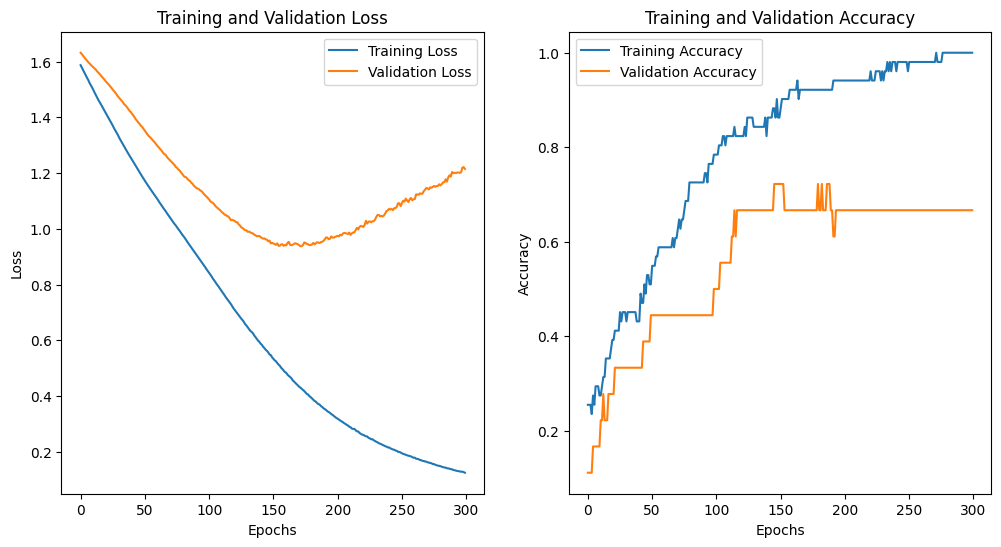

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count = X_train_transformed.shape[1]
output_neurons = y_train.shape[1]

keras_model = Sequential()

keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(output_neurons, activation='softmax'))

keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = keras_model.fit(X_train_transformed, y_train,
                          batch_size=20,
                          epochs=300,
                          validation_split=0.25)

history_dict = history.history

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.1882 - loss: 1.6138 - val_accuracy: 0.2222 - val_loss: 1.6046
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2105 - loss: 1.6024 - val_accuracy: 0.2222 - val_loss: 1.6005
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1855 - loss: 1.5982 - val_accuracy: 0.2222 - val_loss: 1.5964
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2266 - loss: 1.5849 - val_accuracy: 0.2778 - val_loss: 1.5916
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3256 - loss: 1.5786 - val_accuracy: 0.2778 - val_loss: 1.5874
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3444 - loss: 1.5683 - val_accuracy: 0.2778 - val_loss: 1.5821
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3327 - loss: 1.5659 - val_accuracy: 0.2778 - val_loss: 1.5779
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4086 - loss: 1.5602 - val_accuracy: 0.3333 - val_loss

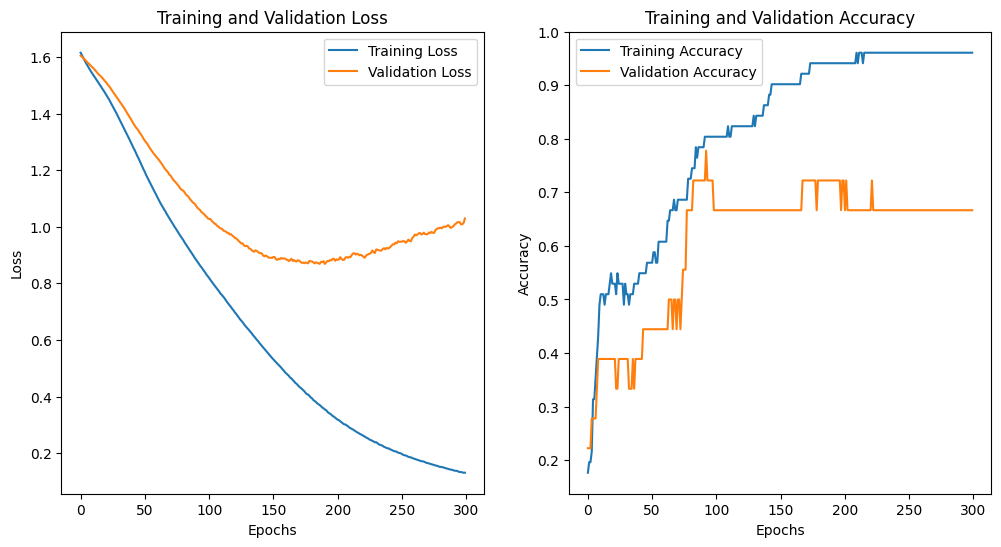

In [ ]:


feature_count = X_train_transformed.shape[1]
output_neurons = y_train.shape[1]

keras_model = Sequential()

keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(output_neurons, activation='softmax'))

keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = keras_model.fit(X_train_transformed, y_train,
                          batch_size=20,
                          epochs=300,
                          validation_split=0.25)

history_dict = history.history

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [ ]:
feature_count = X_train_transformed2.shape[1]

output_neurons = y_train.shape[1]

keras_model = Sequential()

keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(output_neurons, activation='softmax'))

keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

keras_model.fit(X_train_transformed2, y_train,
                batch_size=20,
                epochs=300,
                validation_split=0.25)

predicted_probabilities = keras_model.predict(X_test_transformed2)

prediction_column_index = np.argmax(predicted_probabilities, axis=1)

accuracy = accuracy_score(y_true_labels, prediction_column_index)
print("Model Accuracy on Test Data (Model 3):", accuracy)

print("\nClassification Report:")
print(classification_report(y_true_labels, prediction_column_index))



Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 57s 201ms/step - accuracy: 0.1311 - loss: 1.6294 - val_accuracy: 0.1667 - val_loss: 1.6415
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1588 - loss: 1.6179 - val_accuracy: 0.1667 - val_loss: 1.6343
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1463 - loss: 1.6095 - val_accuracy: 0.2222 - val_loss: 1.6273
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1534 - loss: 1.6055 - val_accuracy: 0.2222 - val_loss: 1.6197
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1249 - loss: 1.5968 - val_accuracy: 0.2222 - val_loss: 1.6130
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2078 - loss: 1.5908 - val_accuracy: 0.2222 - val_loss: 1.6079
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2087 - loss: 1.5867 - val_accuracy: 0.2222 - val_loss: 1.6030
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2301 - loss: 1.5766 - val_accuracy: 0.2778 - val_los